In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import itertools


# Load Data

In [2]:
seed = 5
data_path = "ObesityDataSet_raw_and_data_sinthetic.csv"

In [3]:
from sklearn import preprocessing

# Read data
data = pd.read_csv(data_path, header=0)



to_encode = ['Gender', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'FAVC', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
label_encoder = preprocessing.LabelEncoder()

df = data[to_encode]
df = df.apply(label_encoder.fit_transform)

data = data.drop(to_encode, axis=1)
data = pd.concat([data, df], axis=1)


data.describe()

# Last column represnets label, and others are features
features = np.array(data.iloc[:, 0:-1])
classes = np.array(data.iloc[:, -1])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6ab071c50>,
      dtype=object)

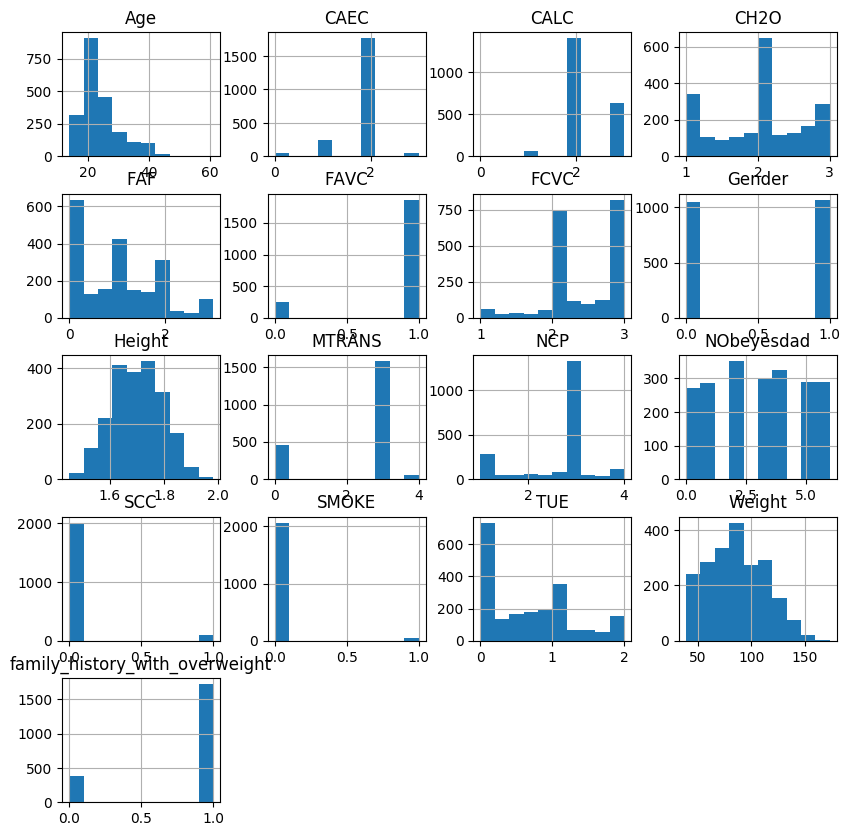

In [4]:
# draw hist for dataset
data.hist(figsize=(10, 10))

In [5]:
# split data
training_x, testing_x, training_y, testing_y = sklearn.model_selection.train_test_split(
features, classes, test_size=0.2, random_state=seed, stratify=classes)

In [6]:
print(training_x.shape)
print(testing_x.shape)
print(training_y.shape)
print(testing_y.shape)

(1688, 16)
(423, 16)
(1688,)
(423,)


In [7]:
from sklearn.preprocessing import StandardScaler

features = StandardScaler().fit_transform(features)
training_x = StandardScaler().fit_transform(training_x)
testing_x = StandardScaler().fit_transform(testing_x)


# Accuracy
### According to the fig above, the sample is not balanced (Death = 1 samples are significally fewer than Death = 0 samples), so we use "weighted" mode for accuracy calculating.

In [8]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import compute_sample_weight

def balanced_accuracy(truth, pred):
    wts = compute_sample_weight('balanced', truth)
    return accuracy_score(truth, pred, sample_weight=wts)


# Section 4: KNN

In [9]:
n_neighbors = np.arange(1, 51, 3)
params = {'metric': ['manhattan', 'euclidean', 'chebyshev'], 'n_neighbors': np.arange(1, 51, 3),
          'weights': ['uniform']}



Use grid search to find best params. Take a few minutes.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator


KNN_classifier = KNeighborsClassifier()

grid_seacher = sklearn.model_selection.GridSearchCV(KNN_classifier, n_jobs=40, param_grid=params, 
                                                    refit=True, verbose=10, cv=5, scoring=make_scorer(accuracy_score))
grid_fit = grid_seacher.fit(training_x, training_y)


Fitting 5 folds for each of 51 candidates, totalling 255 fits
[CV] metric=manhattan, n_neighbors=1, weights=uniform ................[CV] metric=manhattan, n_neighbors=1, weights=uniform ................
[CV] metric=manhattan, n_neighbors=1, weights=uniform ................
[CV] metric=manhattan, n_neighbors=1, weights=uniform ................

[CV] metric=manhattan, n_neighbors=1, weights=uniform ................
[CV] metric=manhattan, n_neighbors=4, weights=uniform ................[CV]  metric=manhattan, n_neighbors=1, weights=uniform, score=0.8852941176470588, total=   4.1s[CV] metric=manhattan, n_neighbors=4, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=1, weights=uniform, score=0.8664688427299704, total=   1.9s[CV]  metric=manhattan, n_neighbors=1, weights=uniform, score=0.8621700879765396, total=   3.7s[CV] metric=manhattan, n_neighbors=4, weights=uniform ................[CV]  metric=manhattan, n_neighbors=1, weights=uniform, score=0.8562874251497006, total

[Parallel(n_jobs=40)]: Done   5 tasks      | elapsed:   41.7s




[CV] metric=manhattan, n_neighbors=7, weights=uniform ................[CV]  metric=manhattan, n_neighbors=7, weights=uniform, score=0.8382352941176471, total=   5.5s

[CV] metric=manhattan, n_neighbors=10, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=10, weights=uniform, score=0.8123167155425219, total=   1.2s

[CV]  metric=manhattan, n_neighbors=7, weights=uniform, score=0.8532934131736527, total=   3.5s[CV]  metric=manhattan, n_neighbors=7, weights=uniform, score=0.857566765578635, total=  13.0s[CV] metric=manhattan, n_neighbors=10, weights=uniform ...............

[CV]  metric=manhattan, n_neighbors=7, weights=uniform, score=0.8452380952380952, total=  12.4s
[CV] metric=manhattan, n_neighbors=10, weights=uniform ...............

[CV]  metric=manhattan, n_neighbors=10, weights=uniform, score=0.8367952522255193, total=   1.5s[CV] metric=manhattan, n_neighbors=10, weights=uniform ...............
[CV] metric=manhattan, n_neighbors=13, weights=uniform ............

[Parallel(n_jobs=40)]: Done  18 tasks      | elapsed:  1.1min



[CV] metric=manhattan, n_neighbors=13, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=13, weights=uniform, score=0.7917888563049853, total=   4.3s
[CV]  metric=manhattan, n_neighbors=13, weights=uniform, score=0.8117647058823529, total=   0.7s
[CV]  metric=manhattan, n_neighbors=10, weights=uniform, score=0.8532934131736527, total=   4.7s
[CV] metric=manhattan, n_neighbors=13, weights=uniform ...............

[CV]  metric=manhattan, n_neighbors=13, weights=uniform, score=0.8592814371257484, total=   1.0s[CV]  metric=manhattan, n_neighbors=13, weights=uniform, score=0.8219584569732937, total=   2.9s
[CV] metric=manhattan, n_neighbors=16, weights=uniform ...............


[CV] metric=manhattan, n_neighbors=16, weights=uniform ...............[CV] metric=manhattan, n_neighbors=16, weights=uniform ...............[CV] metric=manhattan, n_neighbors=16, weights=uniform ...............

[CV]  metric=manhattan, n_neighbors=16, weights=uniform, score=0.7852941176470588, total

[Parallel(n_jobs=40)]: Done  33 tasks      | elapsed:  1.7min


[CV] metric=manhattan, n_neighbors=25, weights=uniform ...............


[CV] metric=manhattan, n_neighbors=25, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=25, weights=uniform, score=0.7331378299120235, total=   0.8s[CV] metric=manhattan, n_neighbors=25, weights=uniform ...............

[CV] metric=manhattan, n_neighbors=25, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=25, weights=uniform, score=0.7676470588235295, total=   0.0s

[CV] metric=manhattan, n_neighbors=28, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=25, weights=uniform, score=0.7804154302670623, total=   0.4s[CV]  metric=manhattan, n_neighbors=25, weights=uniform, score=0.7321428571428571, total=   0.9s
[CV] metric=manhattan, n_neighbors=28, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=25, weights=uniform, score=0.7964071856287425, total=   0.6s


[CV] metric=manhattan, n_neighbors=28, weights=uniform ...............

[CV] metric=manh

[Parallel(n_jobs=40)]: Done  48 tasks      | elapsed:  2.1min



[CV]  metric=manhattan, n_neighbors=31, weights=uniform, score=0.7067448680351907, total=   2.8s[CV] metric=manhattan, n_neighbors=31, weights=uniform ...............
[CV] metric=manhattan, n_neighbors=34, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=31, weights=uniform, score=0.7626112759643917, total=   1.2s
[CV]  metric=manhattan, n_neighbors=31, weights=uniform, score=0.7411764705882353, total=   0.6s[CV] metric=manhattan, n_neighbors=34, weights=uniform ...............


[CV]  metric=manhattan, n_neighbors=31, weights=uniform, score=0.781437125748503, total=   1.0s[CV]  metric=manhattan, n_neighbors=31, weights=uniform, score=0.7142857142857143, total=   1.9s

[CV] metric=manhattan, n_neighbors=34, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=34, weights=uniform, score=0.7352941176470589, total=   2.8s[CV] metric=manhattan, n_neighbors=34, weights=uniform ...............[CV]  metric=manhattan, n_neighbors=34, weights=uniform, score=0.7

[Parallel(n_jobs=40)]: Done  65 tasks      | elapsed:  2.7min


[CV]  metric=manhattan, n_neighbors=40, weights=uniform, score=0.7205882352941176, total=   0.3s
[CV]  metric=manhattan, n_neighbors=40, weights=uniform, score=0.7507418397626113, total=   0.3s[CV]  metric=manhattan, n_neighbors=40, weights=uniform, score=0.6964285714285714, total=   4.4s

[CV] metric=manhattan, n_neighbors=43, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=40, weights=uniform, score=0.7365269461077845, total=   6.5s[CV] metric=manhattan, n_neighbors=43, weights=uniform ...............
[CV] metric=manhattan, n_neighbors=43, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=43, weights=uniform, score=0.7176470588235294, total=   0.0s[CV]  metric=manhattan, n_neighbors=43, weights=uniform, score=0.7067448680351907, total=   0.4s
[CV]  metric=manhattan, n_neighbors=40, weights=uniform, score=0.7096774193548387, total=  10.3s
[CV]  metric=manhattan, n_neighbors=43, weights=uniform, score=0.7477744807121661, total=   0.4s

[CV] metric=

[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:  3.3min


[CV] metric=manhattan, n_neighbors=49, weights=uniform ...............
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................[CV] metric=manhattan, n_neighbors=49, weights=uniform ...............

[CV] metric=euclidean, n_neighbors=1, weights=uniform ................[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.8328445747800587, total=   0.2s[CV]  metric=manhattan, n_neighbors=49, weights=uniform, score=0.7065868263473054, total=   0.4s

[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=49, weights=uniform, score=0.6815476190476191, total=   0.6s
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.8558823529411764, total=   0.0s
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.8189910979228486, total=   0.0s

[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.8303571428571429, total=   0

[Parallel(n_jobs=40)]: Done 101 tasks      | elapsed:  3.9min


[CV]  metric=euclidean, n_neighbors=10, weights=uniform, score=0.7529411764705882, total=   1.4s
[CV] metric=euclidean, n_neighbors=10, weights=uniform ...............[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV] metric=euclidean, n_neighbors=10, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=10, weights=uniform, score=0.781437125748503, total=   0.0s
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, score=0.718475073313783, total=   0.1s

[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............


[CV]  metric=euclidean, n_neighbors=13, weights=uniform, score=0.7202380952380952, total=   0.0s[CV]  metric=euclidean, n_neighbors=13, weights=uniform, score=0.7411764705882353, total=   0.3s

[CV]  metric=euclidean, n_neighbors=10, weights=uniform, score=0.7291666666666666, total=  

[Parallel(n_jobs=40)]: Done 120 tasks      | elapsed:  4.2min


[CV] metric=euclidean, n_neighbors=22, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=22, weights=uniform, score=0.6803519061583577, total=   0.6s[CV] metric=euclidean, n_neighbors=22, weights=uniform ...............

[CV] metric=euclidean, n_neighbors=22, weights=uniform ...............[CV] metric=euclidean, n_neighbors=22, weights=uniform ...............

[CV]  metric=euclidean, n_neighbors=22, weights=uniform, score=0.7147058823529412, total=   0.8s[CV]  metric=euclidean, n_neighbors=22, weights=uniform, score=0.6726190476190477, total=   0.5s

[CV]  metric=euclidean, n_neighbors=22, weights=uniform, score=0.7181008902077152, total=   2.4s
[CV] metric=euclidean, n_neighbors=22, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=22, weights=uniform, score=0.7455089820359282, total=   0.5s[CV] metric=euclidean, n_neighbors=25, weights=uniform ...............[CV] metric=euclidean, n_neighbors=25, weights=uniform ...............


[CV]  metric=eucli

[Parallel(n_jobs=40)]: Done 141 tasks      | elapsed:  4.8min


[CV] metric=euclidean, n_neighbors=37, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=37, weights=uniform, score=0.6764705882352942, total=   0.7s[CV] metric=euclidean, n_neighbors=37, weights=uniform ...............
[CV] metric=euclidean, n_neighbors=40, weights=uniform ...............[CV]  metric=euclidean, n_neighbors=37, weights=uniform, score=0.6309523809523809, total=   0.2s

[CV]  metric=euclidean, n_neighbors=40, weights=uniform, score=0.656891495601173, total=   0.1s[CV]  metric=euclidean, n_neighbors=37, weights=uniform, score=0.6946107784431138, total=   0.1s

[CV] metric=euclidean, n_neighbors=40, weights=uniform ...............
[CV] metric=euclidean, n_neighbors=40, weights=uniform ...............

[CV] metric=euclidean, n_neighbors=40, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=40, weights=uniform, score=0.6823529411764706, total=   0.3s
[CV] metric=euclidean, n_neighbors=40, weights=uniform ...............
[CV]  metric=euclid

[Parallel(n_jobs=40)]: Done 162 tasks      | elapsed:  4.9min


[CV] metric=chebyshev, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=46, weights=uniform, score=0.6795252225519288, total=   0.7s
[CV] metric=chebyshev, n_neighbors=1, weights=uniform ................
[CV] metric=chebyshev, n_neighbors=1, weights=uniform ................

[CV]  metric=euclidean, n_neighbors=49, weights=uniform, score=0.6407185628742516, total=   0.0s[CV]  metric=chebyshev, n_neighbors=1, weights=uniform, score=0.7916666666666666, total=   0.0s

[CV]  metric=chebyshev, n_neighbors=1, weights=uniform, score=0.7893175074183977, total=   0.1s
[CV]  metric=chebyshev, n_neighbors=1, weights=uniform, score=0.8053892215568862, total=   0.0s
[CV]  metric=chebyshev, n_neighbors=1, weights=uniform, score=0.7823529411764706, total=   0.3s
[CV]  metric=euclidean, n_neighbors=49, weights=uniform, score=0.6470588235294118, total=   0.1s
[CV]  metric=euclidean, n_neighbors=46, weights=uniform, score=0.625, total=   1.0s
[CV] metric=chebyshev, n_ne

[Parallel(n_jobs=40)]: Done 202 out of 255 | elapsed:  5.2min remaining:  1.4min







[CV]  metric=chebyshev, n_neighbors=22, weights=uniform, score=0.6352941176470588, total=   0.2s
[CV] metric=chebyshev, n_neighbors=31, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=25, weights=uniform, score=0.5982404692082112, total=   0.3s
[CV] metric=chebyshev, n_neighbors=31, weights=uniform ...............
[CV] metric=chebyshev, n_neighbors=31, weights=uniform ...............[CV]  metric=chebyshev, n_neighbors=28, weights=uniform, score=0.6261127596439169, total=   0.0s[CV] metric=chebyshev, n_neighbors=31, weights=uniform ...............[CV]  metric=chebyshev, n_neighbors=28, weights=uniform, score=0.6137724550898204, total=   0.1s
[CV] metric=chebyshev, n_neighbors=34, weights=uniform ...............

[CV] metric=chebyshev, n_neighbors=34, weights=uniform ...............




[CV] metric=chebyshev, n_neighbors=34, weights=uniform ...............[CV]  metric=chebyshev, n_neighbors=28, weights=uniform, score=0.5835777126099707, total=   0.0s
[CV]  metric

[Parallel(n_jobs=40)]: Done 228 out of 255 | elapsed:  5.2min remaining:   37.1s



[CV] metric=chebyshev, n_neighbors=46, weights=uniform ...............
[CV] metric=chebyshev, n_neighbors=46, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=43, weights=uniform, score=0.5565476190476191, total=   0.0s[CV]  metric=chebyshev, n_neighbors=40, weights=uniform, score=0.5676470588235294, total=   0.0s



[CV] metric=chebyshev, n_neighbors=49, weights=uniform ...............[CV]  metric=chebyshev, n_neighbors=46, weights=uniform, score=0.5483870967741935, total=   0.0s[CV] metric=chebyshev, n_neighbors=49, weights=uniform ...............[CV]  metric=chebyshev, n_neighbors=46, weights=uniform, score=0.5647058823529412, total=   0.0s



[CV] metric=chebyshev, n_neighbors=49, weights=uniform ...............
[CV] metric=chebyshev, n_neighbors=49, weights=uniform ...............

[CV]  metric=chebyshev, n_neighbors=46, weights=uniform, score=0.5386904761904762, total=   0.0s[CV]  metric=chebyshev, n_neighbors=43, weights=uniform, score=0.5449101796407185, tot

[Parallel(n_jobs=40)]: Done 255 out of 255 | elapsed:  5.3min finished


In [14]:
train_means = grid_fit.cv_results_['mean_train_score']
train_stds = grid_fit.cv_results_['std_train_score']
test_means = grid_fit.cv_results_['mean_test_score']
test_stds = grid_fit.cv_results_['std_test_score']

print("Results for different params")
for train_mean, train_std, test_mean, test_std, params in \
    zip(train_means, train_stds, test_means, test_stds, grid_fit.cv_results_['params']):
    print("train: %0.3f (+/-%0.3f); test: %0.3f (+/-%0.3f) for %r" \
              %(train_mean, train_std*2, test_mean, test_std*2, params))

Results for different params
train: 1.000 (+/-0.000); test: 0.870 (+/-0.021) for {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
train: 0.913 (+/-0.004); test: 0.848 (+/-0.031) for {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
train: 0.884 (+/-0.008); test: 0.843 (+/-0.026) for {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
train: 0.862 (+/-0.013); test: 0.822 (+/-0.046) for {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}
train: 0.845 (+/-0.005); test: 0.814 (+/-0.052) for {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
train: 0.828 (+/-0.004); test: 0.791 (+/-0.059) for {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'uniform'}
train: 0.814 (+/-0.009); test: 0.787 (+/-0.067) for {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
train: 0.797 (+/-0.009); test: 0.767 (+/-0.068) for {'metric': 'manhattan', 'n_neighbors': 22, 'weights': 'uniform'}
train: 0.788 (+/-0.011); test: 0.762 (

/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


# Results on training set

In [19]:
best_estimator = grid_fit.best_estimator_
best_estimator.fit(training_x, training_y)

training_y_pred = best_estimator.predict(training_x)

print("Model performance on training set")
print("----------------")
print("Final balanced accuracy score on the training data: {:.4f}".format(balanced_accuracy(training_y, training_y_pred)))
print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(training_y, training_y_pred)))
print("Final precision score on training data: {:.4f}".format(precision_score(training_y, training_y_pred, average="micro")))
print("Final recall score on training data: {:.4f}".format(recall_score(training_y, training_y_pred, average="micro")))
print("\n")
print("The best parameters are: {}".format(best_estimator))


Model performance on training set
----------------
Final balanced accuracy score on the training data: 1.0000
Final accuracy score on the training data: 1.0000
Final precision score on training data: 1.0000
Final recall score on training data: 1.0000


The best parameters are: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


# Results on testing set

In [20]:
testing_y_pred = best_estimator.predict(testing_x)

print("Model performance on testing set")
print("----------------")
print("Final balanced accuracy score on the testing data: {:.4f}".format(balanced_accuracy(testing_y, testing_y_pred)))
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(testing_y, testing_y_pred)))
print("Final precision score on testing data: {:.4f}".format(precision_score(testing_y, testing_y_pred, average="micro")))
print("Final recall score on testing data: {:.4f}".format(recall_score(testing_y, testing_y_pred, average="micro")))
# print("Final ROC AUC score on testing data: {:.4f}".format(roc_auc_score(testing_y, testing_y_pred)))


Model performance on testing set
----------------
Final balanced accuracy score on the testing data: 0.8589
Final accuracy score on the testing data: 0.8629
Final precision score on testing data: 0.8629
Final recall score on testing data: 0.8629


# Confusion Matrix for testing set

Text(0.5,110.486,'Predicted label')

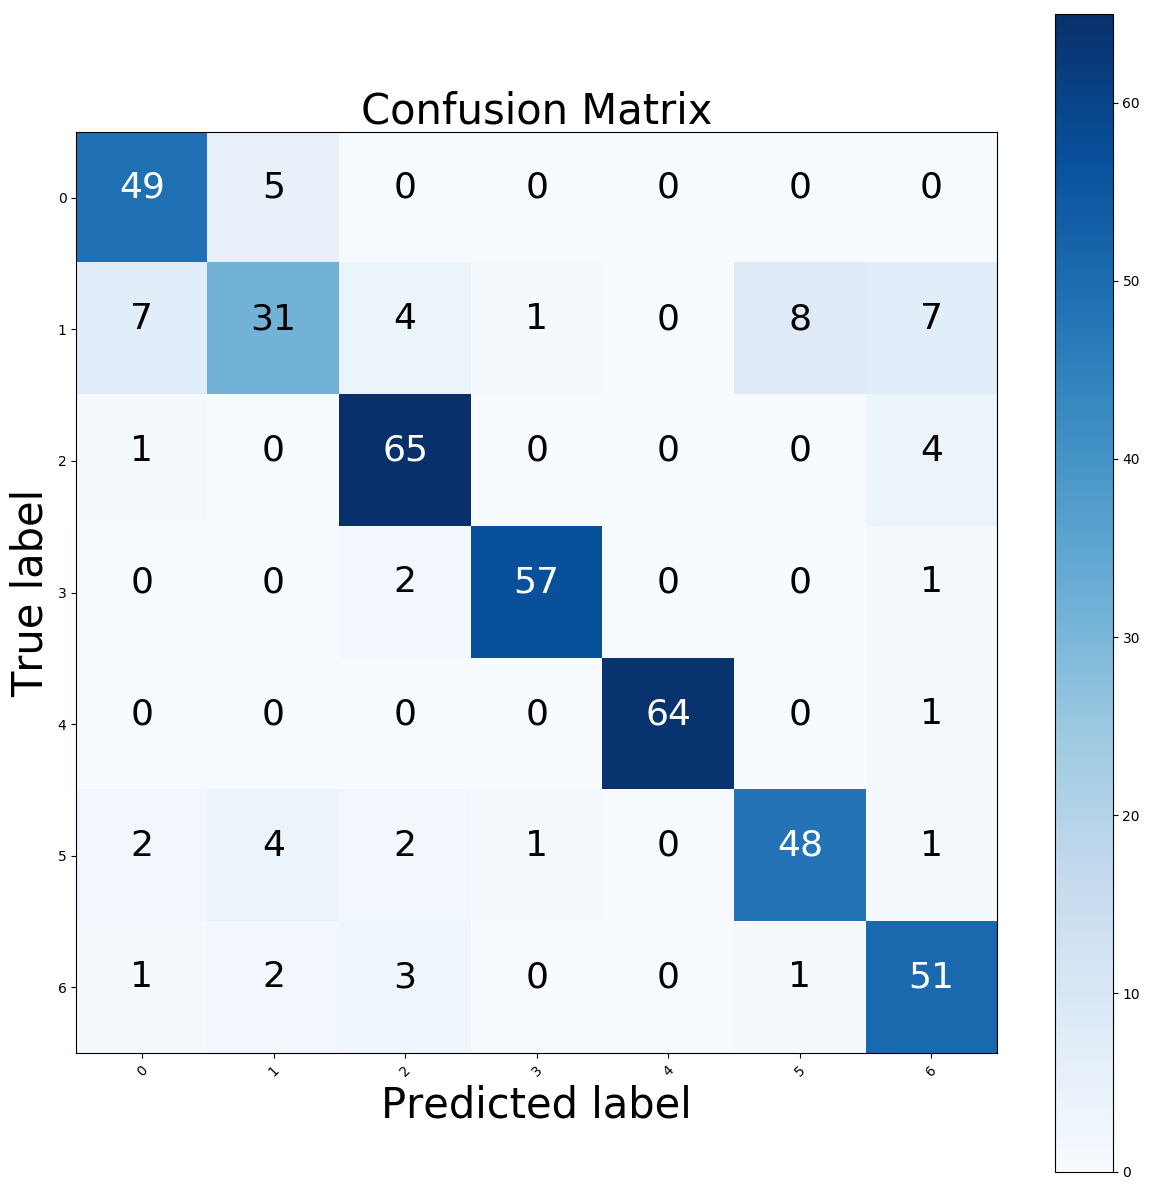

In [17]:
from sklearn.metrics import confusion_matrix

# calculate
confusion_matrix = confusion_matrix(testing_y, testing_y_pred)
normed_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
num_classes = np.unique(classes)

cmap=plt.cm.Blues
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = 'd'
thresh = confusion_matrix.max() / 2.0

for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=26)


plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)






Text(0.5,110.486,'Predicted label')

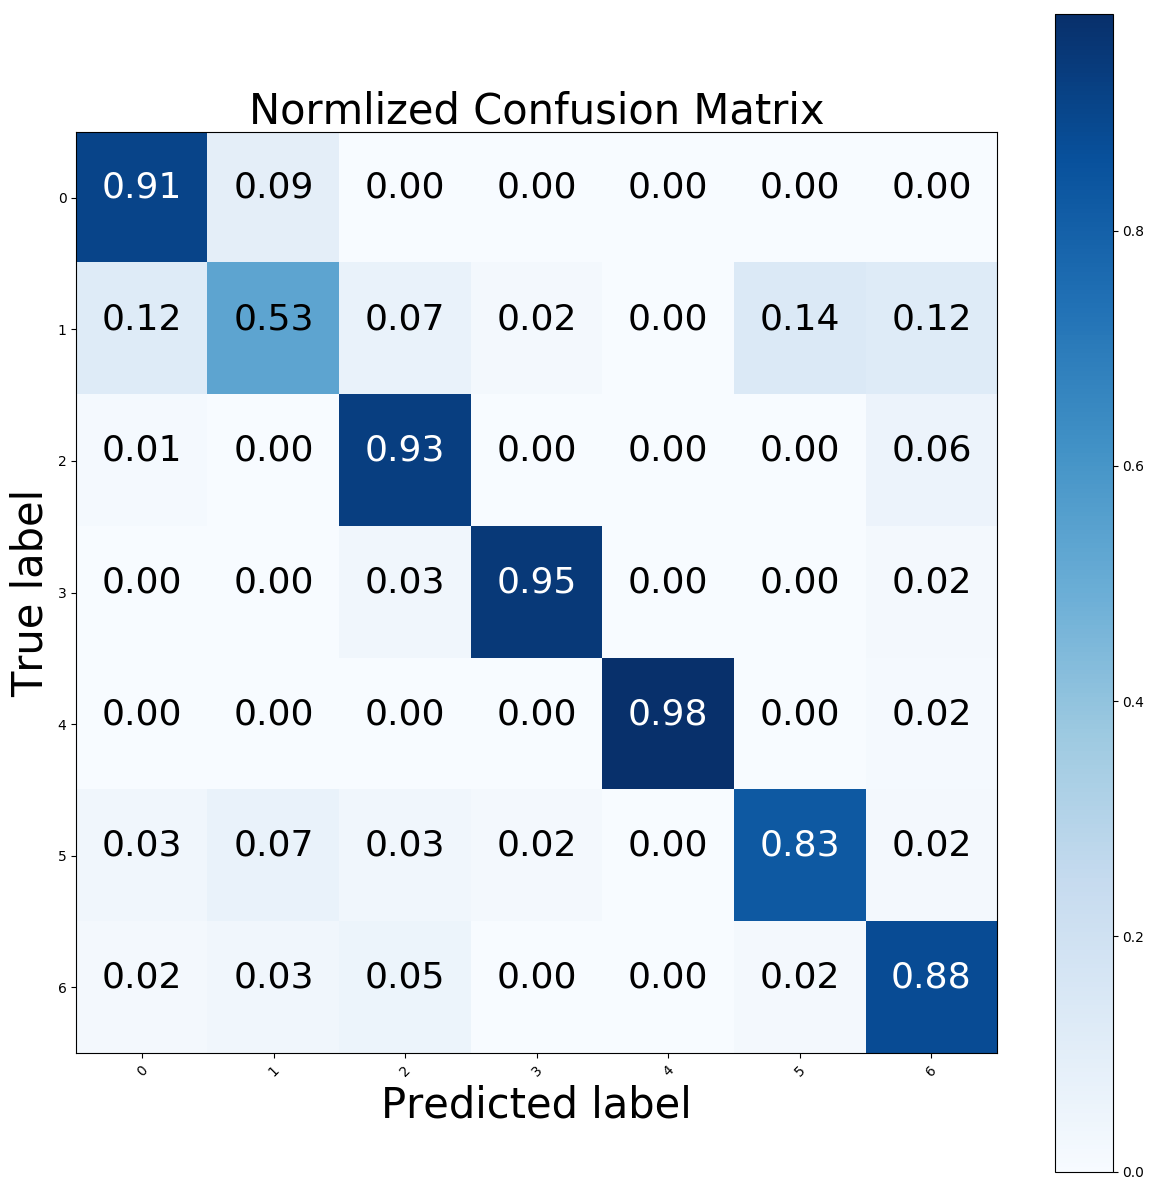

In [18]:
plt.close()
plt.figure(figsize=(12, 12))
plt.imshow(normed_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title('Normlized Confusion Matrix', fontsize=30)
plt.colorbar()
tick_marks = np.arange(len(num_classes))
plt.xticks(tick_marks, num_classes, rotation=45)
plt.yticks(tick_marks, num_classes)
plt.tight_layout()

fmt = '.2f'
thresh = confusion_matrix.max() / 2.0
for i, j in itertools.product(range(normed_confusion_matrix.shape[0]), range(normed_confusion_matrix.shape[1])):
    plt.text(j, i, format(normed_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color='white' if confusion_matrix[i, j] > thresh else "black",
            size=26)

plt.tight_layout()
plt.ylabel('True label', fontsize=30)
plt.xlabel('Predicted label', fontsize=30)

# Learning Curve

In [35]:
train_sizes = np.append(np.linspace(0.05, 0.1, 20, endpoint=False),
                            np.linspace(0.1, 1, 20, endpoint=True))

# calculate

# balanced accuracy
# balanced_accuracy_train_sizes, balanced_accuracy_train_scores, balanced_accuracy_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=data1_scorer,
#     n_jobs=4,
#     random_state=seed)


# unbalanced accuracy
accuracy_train_sizes, accuracy_train_scores, accuracy_test_scores = sklearn.model_selection.learning_curve(
    best_estimator,
    training_x,
    training_y,
    cv=5,
    train_sizes=train_sizes,
    verbose=10,
    scoring=make_scorer(accuracy_score),
    n_jobs=4,
    random_state=seed)

# precision
# precision_train_sizes, precision_train_scores, precision_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(precision_score),
#     n_jobs=4,
#     random_state=seed)

# # recall
# recall_train_sizes, recall_train_scores, recall_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(recall_score),
#     n_jobs=4,
#     random_state=seed)

# # roc_auc accuracy
# roc_auc_train_sizes, roc_auc_train_scores, roc_auc_test_scores = sklearn.model_selection.learning_curve(
#     best_estimator,
#     training_x,
#     training_y,
#     cv=5,
#     train_sizes=train_sizes,
#     verbose=10,
#     scoring=make_scorer(roc_auc_score),
#     n_jobs=4,
#     random_state=seed)




[learning_curve] Training set sizes: [  67   70   74   77   80   84   87   90   94   97  101  104  107  111
  114  117  121  124  127  131  134  198  262  326  389  453  517  581
  645  708  772  836  900  964 1027 1091 1155 1219 1283 1347]
[CV]  ................................................................
[CV] ....................... , score=0.6041055718475073, total=   0.0s
[CV]  ................................................................
[CV]  ................................................................[CV]  ................................................................

[CV]  ................................................................
[CV] ....................... , score=0.6217008797653959, total=   0.0s
[CV] ....................... , score=0.6070381231671554, total=   0.0s[CV]  ................................................................[CV] ....................... , score=0.6217008797653959, total=   0.0s


[CV] ....................... , score=0.6217008797

[Parallel(n_jobs=4)]: Done  12 out of 200 | elapsed:    0.1s remaining:    1.9s


[CV]  ................................................................[CV] ....................... , score=0.8475073313782991, total=   0.0s

[CV]  ................................................................
[CV] ....................... , score=0.8387096774193549, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8475073313782991, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8504398826979472, total=   0.0s
[CV] ....................... , score=0.8504398826979472, total=   0.0s[CV]  ................................................................

[CV]  ................................................................
[CV] ....................... , score=0.5941176470588235, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.5941176470588235, total=   0.0s
[CV]  

[Parallel(n_jobs=4)]: Done  33 out of 200 | elapsed:    0.3s remaining:    1.7s


[CV]  ................................................................


[CV]  ................................................................[CV] ....................... , score=0.6470588235294118, total=   0.0s

[CV] ....................... , score=0.6676470588235294, total=   0.0s[CV] ....................... , score=0.6823529411764706, total=   0.0s[CV]  ................................................................

[CV] ....................... , score=0.6823529411764706, total=   0.0s
[CV]  ................................................................[CV]  ................................................................


[CV]  ................................................................[CV] ....................... , score=0.6852941176470588, total=   0.0s

[CV] ....................... , score=0.6852941176470588, total=   0.0s[CV]  ................................................................[CV] ....................... , score=0.6941176470588235, total=   0.0s


[CV]

[Parallel(n_jobs=4)]: Done  54 out of 200 | elapsed:    0.6s remaining:    1.6s



[CV]  ................................................................
[CV] ....................... , score=0.8735294117647059, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8764705882352941, total=   0.0s
[CV]  ................................................................[CV] ....................... , score=0.8764705882352941, total=   0.0s[CV] ....................... , score=0.8794117647058823, total=   0.0s


[CV]  ................................................................[CV]  ................................................................

[CV] ....................... , score=0.5816023738872403, total=   0.0s
[CV] ....................... , score=0.8823529411764706, total=   0.0s
[CV]  ................................................................
[CV]  ................................................................
[CV] ....................... , score=0.5875370919881305, total=   0.0s[CV] .

[Parallel(n_jobs=4)]: Done  75 out of 200 | elapsed:    0.8s remaining:    1.4s
[Parallel(n_jobs=4)]: Done  96 out of 200 | elapsed:    1.0s remaining:    1.1s


[CV] ....................... , score=0.6439169139465876, total=   0.0s
[CV] ....................... , score=0.7329376854599406, total=   0.0s
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................

[CV] ....................... , score=0.7566765578635015, total=   0.0s
[CV]  ................................................................[CV] ....................... , score=0.7774480712166172, total=   0.0s

[CV] ....................... , score=0.7774480712166172, total=   0.0s[CV]  ................................................................

[CV]  ................................................................[CV] ....................... , score=0.7833827893175074, total=   0.0s

[CV]  ................................................................
[CV] ........................ , score=0.798219584569733, total=   0.0s
[CV] 

[Parallel(n_jobs=4)]: Done 117 out of 200 | elapsed:    1.2s remaining:    0.9s
[Parallel(n_jobs=4)]: Done 138 out of 200 | elapsed:    1.4s remaining:    0.6s



[CV]  ................................................................

[CV]  ................................................................
[CV] ....................... , score=0.7738095238095238, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.7946428571428571, total=   0.0s
[CV]  ................................................................[CV] ....................... , score=0.8095238095238095, total=   0.0s

[CV] ....................... , score=0.8244047619047619, total=   0.0s
[CV]  ................................................................[CV]  ................................................................

[CV] ....................... , score=0.8392857142857143, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8630952380952381, total=   0.0s
[CV]  ................................................................
[CV]

[Parallel(n_jobs=4)]: Done 159 out of 200 | elapsed:    1.6s remaining:    0.4s
[Parallel(n_jobs=4)]: Done 180 out of 200 | elapsed:    1.8s remaining:    0.2s


[CV] ........................ , score=0.844311377245509, total=   0.0s

[CV]  ................................................................[CV]  ................................................................

[CV] ....................... , score=0.8532934131736527, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8473053892215568, total=   0.0s
[CV]  ................................................................[CV] ....................... , score=0.8383233532934131, total=   0.0s

[CV]  ................................................................
[CV] ....................... , score=0.8473053892215568, total=   0.0s
[CV]  ................................................................[CV] ....................... , score=0.8532934131736527, total=   0.0s

[CV]  ................................................................
[CV] ....................... , score=0.8562874251497006, total=   0.0s
[CV] 

[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.0s finished


In [22]:
# # plot
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('Balanced Accuracy Learning Curve')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = balanced_accuracy_train_scores
# test_scores = balanced_accuracy_test_scores
# train_sizes = balanced_accuracy_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# # ---------------------------------------------------------------


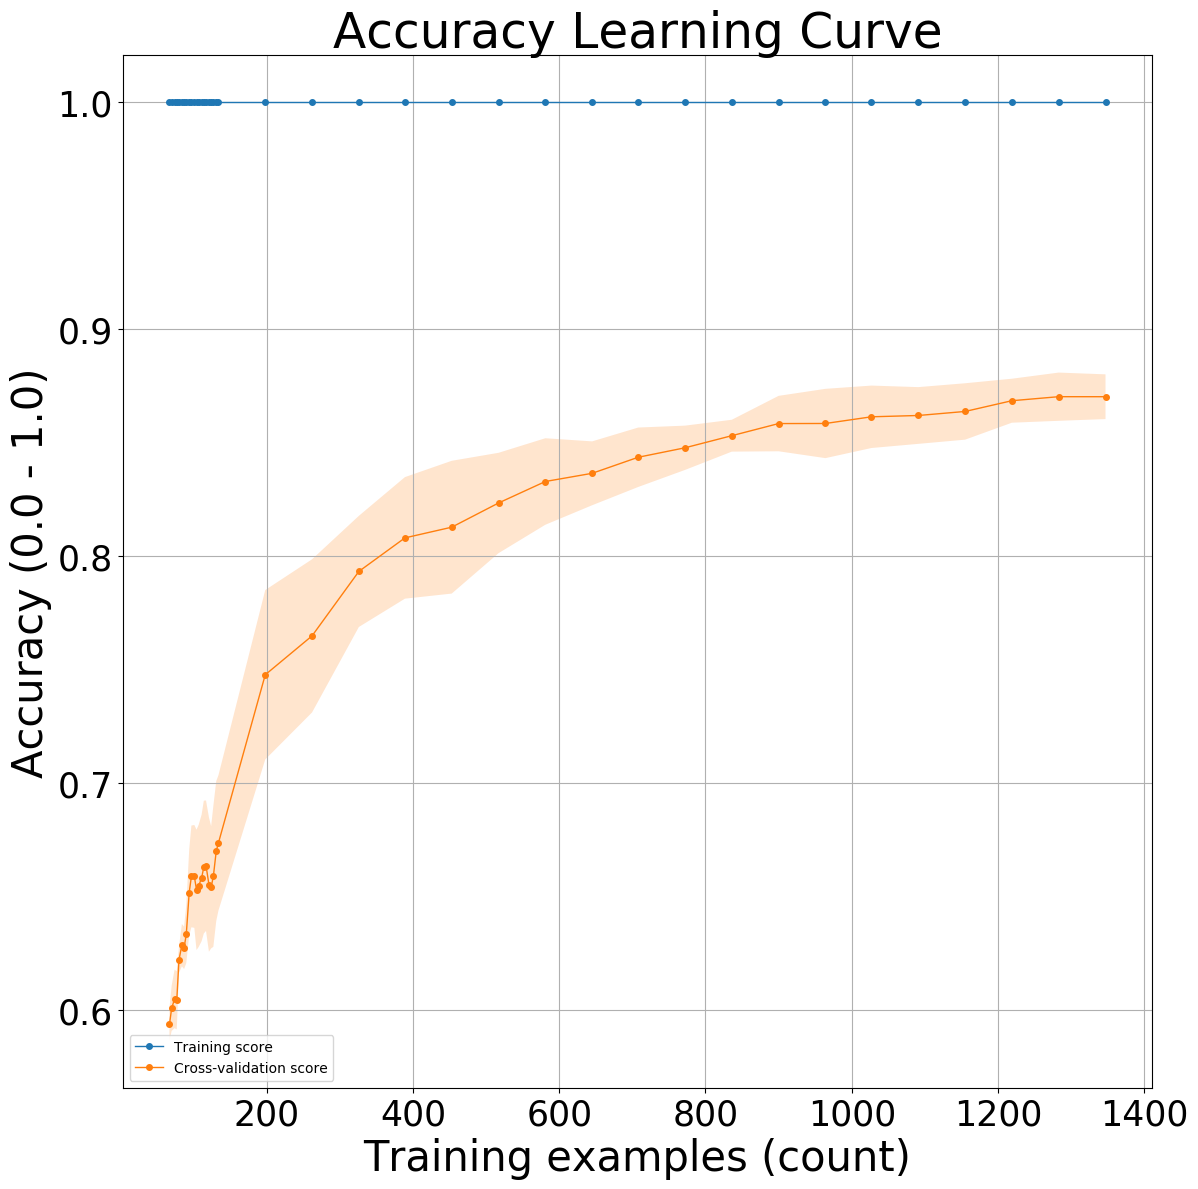

In [37]:
plt.close()
plt.figure(figsize=(12, 12))

plt.tick_params(labelsize=25)

plt.title('Accuracy Learning Curve', fontsize=35)

plt.xlabel('Training examples (count)', fontsize=30)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=30)
plt.grid()
plt.tight_layout()

train_scores = accuracy_train_scores
test_scores = accuracy_test_scores
train_sizes = accuracy_train_sizes

train_points = train_scores
test_points = test_scores

ax = plt.gca()
ax.set_xscale("linear")
ax.set_yscale("linear")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
         label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
         label="Cross-validation score")

plt.legend(loc="best")



# ---------------------------------------------------------------

In [20]:
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('Precision Learning Curve')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = precision_train_scores
# test_scores = precision_test_scores
# train_sizes = precision_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# # -------------------------------------------


In [21]:
# plt.close()
# plt.figure(figsize=(12, 12))

# plt.title('Recall Accuracy Learning Curve')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = recall_train_scores
# test_scores = recall_test_scores
# train_sizes = recall_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")


# # -------------------------------------------


In [22]:
# plt.close()
# plt.figure(figsize=(12, 12))
# plt.title('ROC-AUC Accuracy Learning Curve')
# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = roc_auc_train_scores
# test_scores = roc_auc_test_scores
# train_sizes = roc_auc_train_sizes

# train_points = train_scores
# test_points = test_scores

# ax = plt.gca()
# ax.set_xscale("linear")
# ax.set_yscale("linear")

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#          label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#          label="Cross-validation score")

# plt.legend(loc="best")

# Compelxity Param: n_neighbors

In [24]:
# balanced_accuracy_train_scores, balanced_accuracy_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "n_neighbors", n_neighbors, cv=5,
#                                                  scoring=data1_scorer, n_jobs=4)

accuracy_train_scores, accuracy_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "n_neighbors", n_neighbors, cv=5,
                                                 scoring=make_scorer(accuracy_score), n_jobs=4)

# precision_train_scores, precision_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "n_neighbors", n_neighbors, cv=5,
#                                                  scoring=make_scorer(precision_score), n_jobs=4)

# recall_train_scores, recall_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "n_neighbors", n_neighbors, cv=5,
#                                                  scoring=make_scorer(recall_score), n_jobs=4)

# roc_auc_train_scores, roc_auc_test_scores = sklearn.model_selection.validation_curve(best_estimator,training_x, training_y, "n_neighbors", n_neighbors, cv=5,
#                                                  scoring=make_scorer(roc_auc_score), n_jobs=4)

NameError: name 'balanced_accuracy_train_scores' is not defined

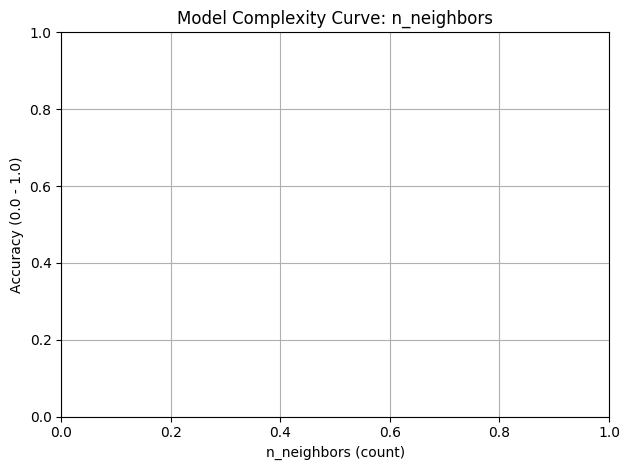

In [25]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: n_neighbors')

# plt.xlabel('n_neighbors (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = balanced_accuracy_train_scores
# test_scores = balanced_accuracy_test_scores
# train_sizes = n_neighbors

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

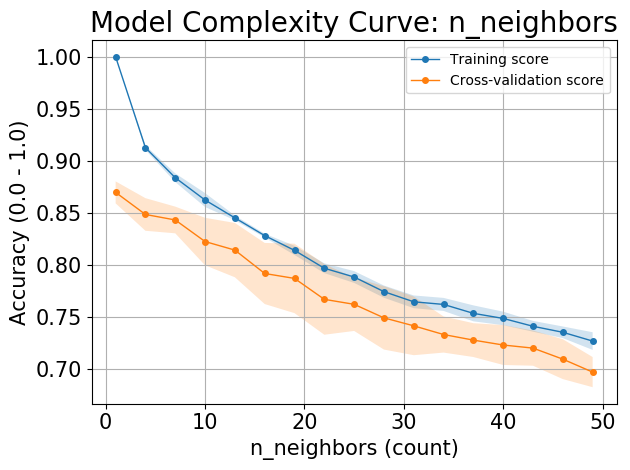

In [31]:
plt.close('all')
plt.figure()
plt.title('Model Complexity Curve: n_neighbors', fontsize=20)

plt.tick_params(labelsize=15)
plt.xlabel('n_neighbors (count)', fontsize=15)
plt.ylabel('Accuracy (0.0 - 1.0)', fontsize=15)
plt.grid()
plt.tight_layout()


train_scores = accuracy_train_scores
test_scores = accuracy_test_scores
train_sizes = n_neighbors

train_points = train_scores
test_points = test_scores
ax = plt.gca()
x_scale = 'linear'
y_scale = 'linear'

ax.set_xscale(x_scale)
ax.set_yscale(y_scale)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_points = train_scores_mean
test_points = test_scores_mean

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2)

plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
     label="Training score")
plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
     label="Cross-validation score")

plt.legend(loc="best")
plt.tight_layout()


In [27]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: n_neighbors')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = precision_train_scores
# test_scores = precision_test_scores
# train_sizes = n_neighbors

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

In [28]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: n_neighbors')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = recall_train_scores
# test_scores = recall_test_scores
# train_sizes = n_neighbors

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

In [29]:
# plt.close('all')
# plt.figure()
# plt.title('Model Complexity Curve: n_neighbors')

# plt.xlabel('Training examples (count)')
# plt.ylabel('Accuracy (0.0 - 1.0)')
# plt.grid()
# plt.tight_layout()

# train_scores = roc_auc_train_scores
# test_scores = roc_auc_test_scores
# train_sizes = n_neighbors

# train_points = train_scores
# test_points = test_scores
# ax = plt.gca()
# x_scale = 'linear'
# y_scale = 'linear'

# ax.set_xscale(x_scale)
# ax.set_yscale(y_scale)

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# train_points = train_scores_mean
# test_points = test_scores_mean

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.2)
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.2)

# plt.plot(train_sizes, train_points, 'o-', linewidth=1, markersize=4,
#      label="Training score")
# plt.plot(train_sizes, test_points, 'o-', linewidth=1, markersize=4,
#      label="Cross-validation score")

# plt.legend(loc="best")
# plt.tight_layout()

# Timing Curve

In [38]:
from time import clock


sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
tests = 5
out = dict()
out['train'] = np.zeros(shape=(len(sizes), tests))
out['test'] = np.zeros(shape=(len(sizes), tests))

for i, frac in enumerate(sizes):
    for j in range(tests):
        np.random.seed(seed)
        x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(training_x, training_y, test_size=1 - frac, random_state=seed)
        st = clock()
        best_estimator.fit(x_train, y_train)
        out['train'][i, j] = (clock() - st)
        st = clock()
        best_estimator.predict(x_test)
        out['test'][i, j] = (clock() - st)


/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
/home/shari/miniconda3/envs/shari_hw_ml/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time

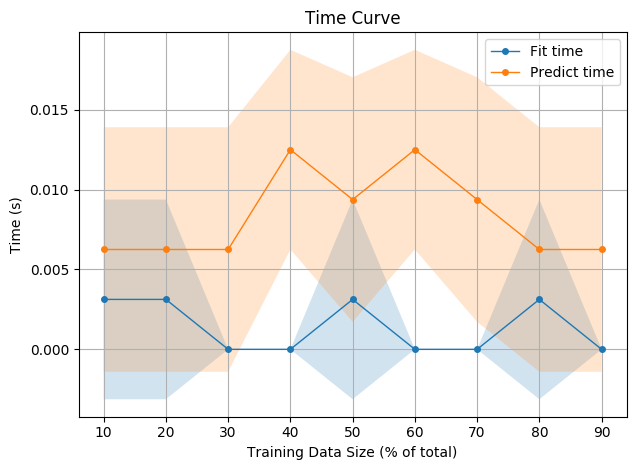

In [39]:
plt.close()
plt.figure()
plt.title("Time Curve")

plt.xlabel("Training Data Size (% of total)")
plt.ylabel("Time (s)")
fit_scores_mean = np.mean(out['train'], axis=1)
fit_scores_std = np.std(out['train'], axis=1)
predict_scores_mean = np.mean(out['test'], axis=1)
predict_scores_std = np.std(out['test'], axis=1)
plt.grid()
plt.tight_layout()

plt.fill_between(np.array(sizes) * 100, fit_scores_mean - fit_scores_std,
                 fit_scores_mean + fit_scores_std, alpha=0.2)
plt.fill_between(np.array(sizes) * 100, predict_scores_mean - predict_scores_std,
                 predict_scores_mean + predict_scores_std, alpha=0.2)
plt.plot(np.array(sizes) * 100, fit_scores_mean, 'o-', linewidth=1, markersize=4,
         label="Fit time")
plt.plot(np.array(sizes) * 100, predict_scores_mean, 'o-', linewidth=1, markersize=4,
         label="Predict time")

plt.legend(loc="best")

In [40]:
print(fit_scores_mean)
print(predict_scores_mean)

[0.003125 0.003125 0.       0.       0.003125 0.       0.       0.003125
 0.      ]
[0.00625  0.00625  0.00625  0.0125   0.009375 0.0125   0.009375 0.00625
 0.00625 ]
